In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('flights.csv')
dados.head() # Verifica as primeiras 5 linhas

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
#M ultiplicando para saber a quantidade em minutos (arrival_time)
0.88*60
#8 Horas de 52 minutos

52.8

In [4]:
dados.tail() # Verifica as últimas 5 linhas

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
# Vizualizar a quantidade de linhas e colunas
dados.shape

(71175, 11)

In [6]:
dados.describe() # Descrição apenas as colunas numericas - Usaremos delay para verificar o atraso

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
dados.describe(include='O') # Include mostra as colunas categ[orica]

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [8]:
dados.info() # Informações dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Visualizações gráficas dos dados

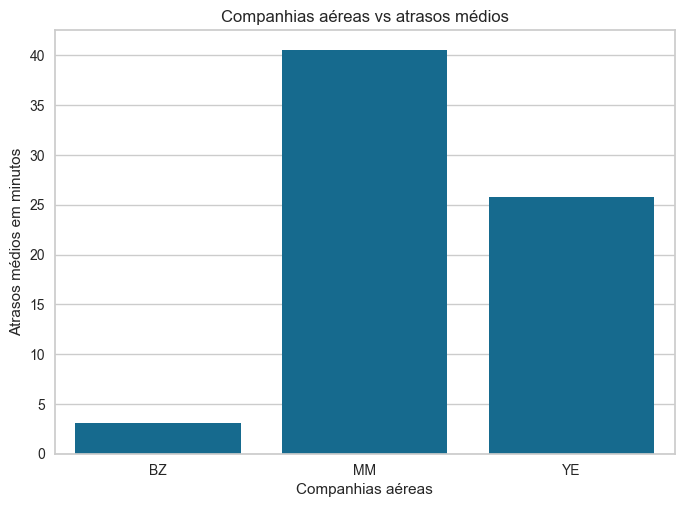

Text(0, 0.5, 'Número de voos')

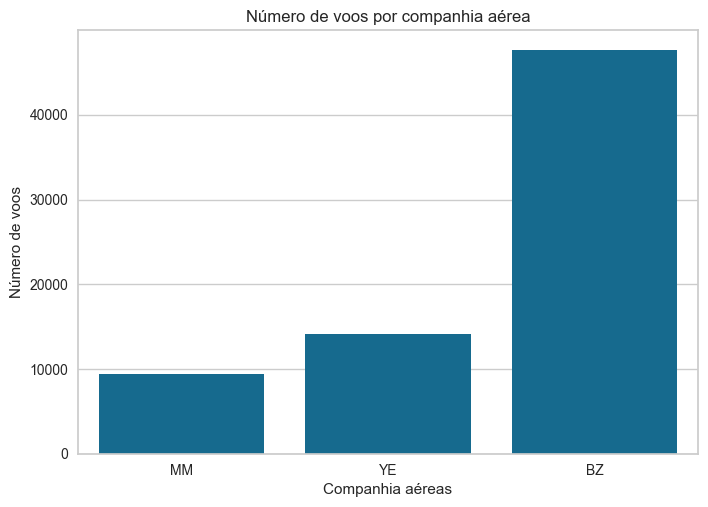

In [9]:
# Verificando pela companhia aerea
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay) # Eixo do gráficos
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=dados, x='airline') # Contagem dos valores da coluna
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aéreas')
plt.ylabel('Número de voos')

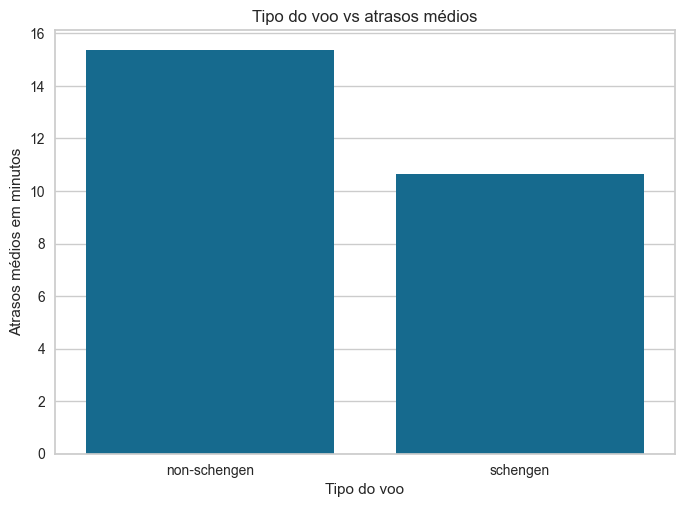

Text(0, 0.5, 'Número de voos')

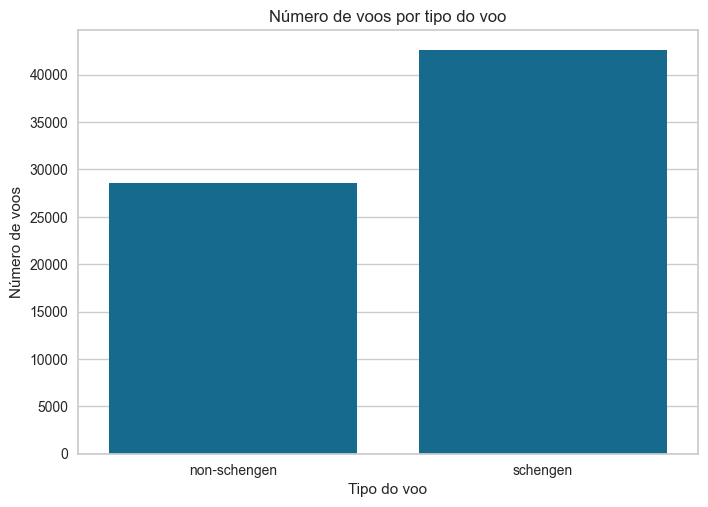

In [10]:
# Verificando pelo tipo do voo
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay) # Eixo do gráficos
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(data=dados, x='schengen') # Contagem dos valores da coluna
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')

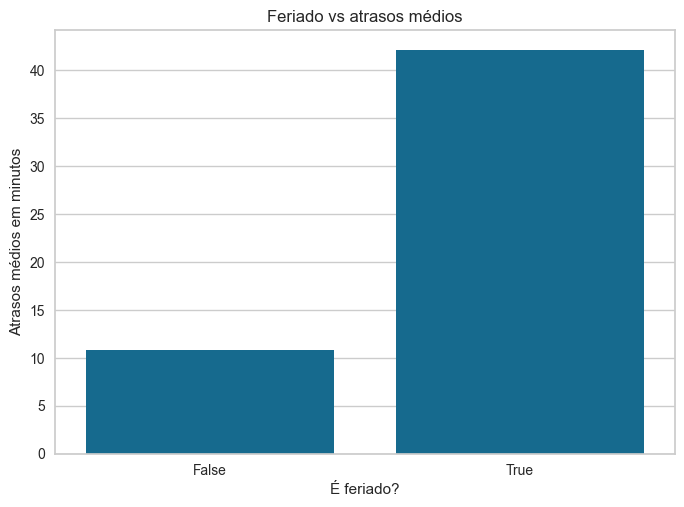

In [11]:
# Verificando por feriados
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay) # Eixo do gráficos
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atrasos médios em minutos')
plt.show()

Text(0, 0.5, 'Número de voos')

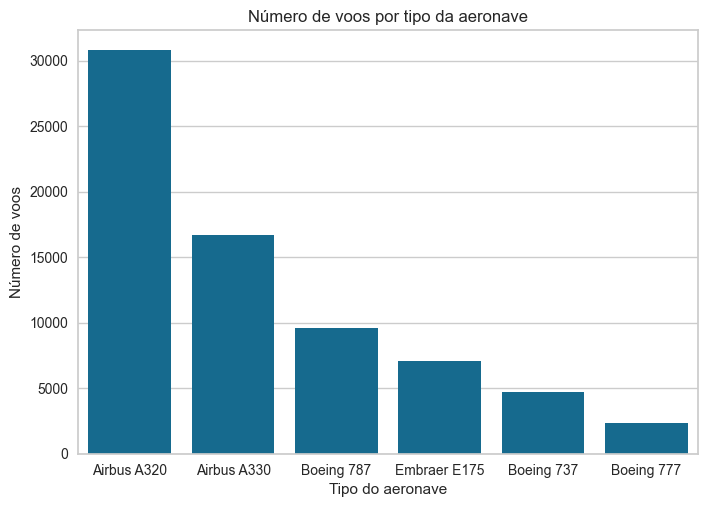

In [12]:
# Verificando tipo de aeronaves existentes
order = dados['aircraft_type'].value_counts().index # Criando uma ordem decrescenete (index para obter apenas os valores das aeronaves)
sns.countplot(data=dados, x='aircraft_type', order=order) # Contagem dos valores da coluna
plt.title('Número de voos por tipo da aeronave')
plt.xlabel('Tipo do aeronave')
plt.ylabel('Número de voos')

Analisando a distribuição dos dados

In [13]:
def calcular_largura_bin(df, coluna):
    # Calcula o primeiro e o terceiro quartil da coluna especificada no DataFrame
    Q75, Q25 = np.percentile(df[coluna], [75, 25])
    # Calcula o intervalo interquartil (IQR)
    IQR = Q75 - Q25
    # Calcula a largura do bin usando a Regra de Freedman-Diaconis
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    # Retorna a largura do bin calculada
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

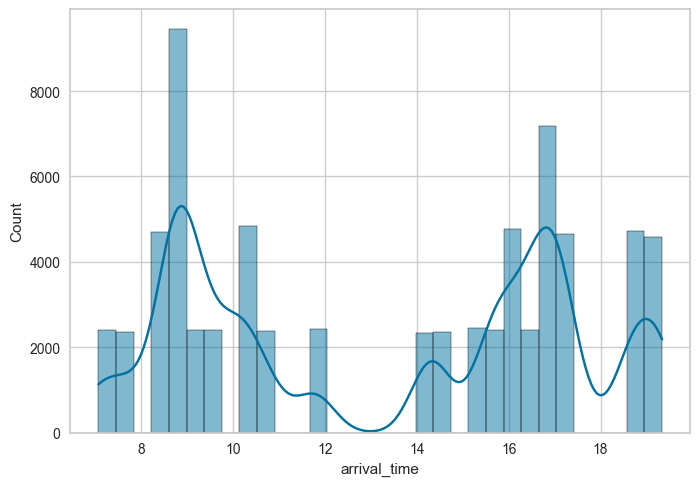

In [14]:
# Histograma de horário de voos - Horário de Chegada
largura_bin_at = calcular_largura_bin(dados, 'arrival_time') # Calcula a largura ideal dos bins para o histograma do horário de chegada dos voos
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at) # KDE -  Kernel Density Estimation - Cruva de distribuição

<Axes: xlabel='departure_time', ylabel='Count'>

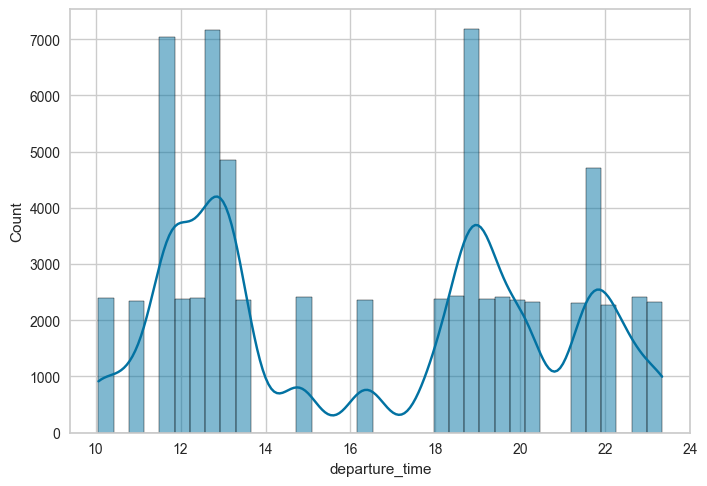

In [15]:
# Histograma de horário de voos - Horário de Saída
largura_bin_at = calcular_largura_bin(dados, 'departure_time') # Calcula a largura ideal dos bins para o histograma do horário de chegada dos voos
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_at) # KDE -  Kernel Density Estimation - Cruva de distribuição

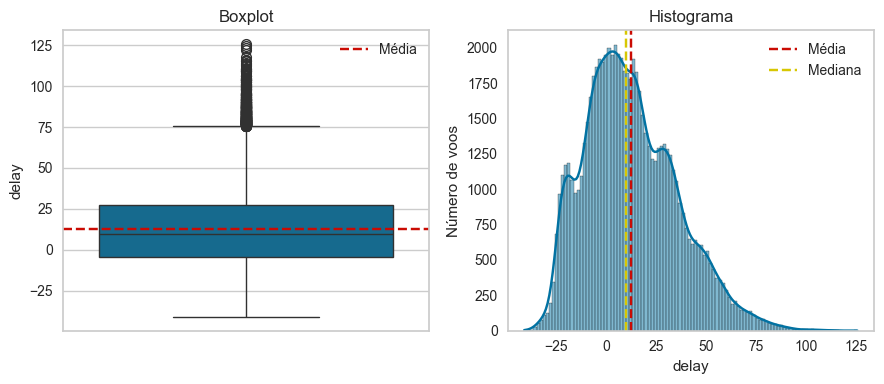

In [16]:
#Calcula a média e a mediana
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4)) # Vários gráficos em uma única figura fi, axes


sns.boxplot(data=dados, y='delay', ax=axes[0]) #  Gráfico de caixa - Primeiro gráfico

axes[0].set_title('Boxplot') # Titulo

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média') #  Linha horizontal para a média na cor vermelha

axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')  #  Largura dos bins para o histograma
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay) #  Histograma - Segundo gráfico

plt.ylabel('Número de voos')
plt.grid(False) # Retirando as grades
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média') #  Linha vertical para a média na cor vermelha
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana') #   Linha vertical para a mediana na cor amarela

axes[1].legend()

plt.tight_layout() #   Ajusta a posição dos títulos para não ficarem sobrepostas
plt.show()

Feature engineering
Features são as variáveis ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações

In [17]:
dados.head() # Primeiras 5 linhas da tabela

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [18]:
# Converte a string concatenada para o formato de data.
dados['date'] = pd.to_datetime(
    dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), # Concatenando as datas
    format='%Y-%j' # Formato da data: '%Y-%j' (ano-dia do ano)
)

dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [19]:
# Adiciona 1 ao dia para corrigir a contagem do Pandas, que começa em 1 e não em 0.
(dados['day'] + 1).astype(str) # Convertido para str

0          1
1          1
2          1
3          1
4          1
        ... 
71170    365
71171    365
71172    365
71173    365
71174    365
Name: day, Length: 71175, dtype: object

In [20]:
# Verificar qual o dia da semana e se é um FDS ou não
#Segunda é 0 e Domingo é 6
# Utilizando pandas.Series.dt.weekday
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [21]:
# Verificando o nome do dia
# Utilizando pandas.Series.dt.day_name
dados ['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


Feature Encoding

In [22]:
# Variavel categórica binária: Somente 2 valores... Sim e Não, É ou não é
dados.nunique() # Numero de valores unicos


flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [23]:
# Verificar qual são esses valores são
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [24]:
# Substituindo os valores por 0 e 1
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1}) # Primeiro código dados['schengen'] é para substituir para a tabela
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1}) 
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1}) 
dados.head()

C:\Users\monni\AppData\Local\Temp\ipykernel_10356\3615509909.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1}) # Primeiro código dados['schengen'] é para substituir para a tabela
C:\Users\monni\AppData\Local\Temp\ipykernel_10356\3615509909.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
C:\Users\monni\AppData\Local\Temp\ipykernel_10356\3615509909.py:4: FutureWarning: Downcas

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [25]:
# Variaveis com mais de 2 categorias
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [26]:
# Usando a função get_dummies da biblioteca Pandas
# Criando novas colunas que são binárias = 0 não possuem aquele valor da coluna criada e 1 já possuia
# Criando um novo df_encoded
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Limpando os dados
Verificar as colunas que fazem sentido de ter no modelo de Machine Learning
-  Não estamos realizando previsões de atrasos no FUTURO. Estamos realizando previsões pontuais para as amostras

In [27]:
# Analise de correlação .corr
df_encoded[['arrival_time', 'departure_time']].corr()
# Essa correlação está muito proxima de ser um positiva perfeita. Com isso elas transmitem praticamente a mesma coisinformação. Podemos remover uma das duas

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [28]:
# Removendo as colunas
# Criando um novo df para atribuir
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
#axis=0: Remove linhas do DataFrame.
#axis=1: Remove colunas do DataFrame.
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Seleção e validação do modelo
- Treinamento do DummmyRegressor

In [29]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [30]:
from sklearn.model_selection import train_test_split
# Treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
#Criação do DummyRegresssor
from sklearn.dummy import DummyRegressor
# Considerar média
model_dummy = DummyRegressor()
# Ajuste do modelo de treino
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [32]:
# Verificar as previsões dos testes
y_pred_dummy = model_dummy.predict(X_test)

In [33]:
y_pred_dummy

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [34]:
# Saber o valor que o nosso modelo está se ajustando
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Utilizar métricas para isso
# y_test = valores reais
# y_pred = valores previstos pelo modelo
def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False) # squared = Quando é True é retornado o MSE, quando é False é retornado o RMSE
    mae = mean_absolute_error(y_test, y_pred) # Média Absoluta de Erro
    r2 = r2_score(y_test, y_pred) 
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

'''Mean squared error - MSE (Erro Quadrático Médio); é uma métrica amplamente utilizada para avaliar a performance de um modelo de aprendizado de máquina
Mean absolute error - MAE (Erro Absoluto Médio); Ela é calculada tomando a média dos valores absolutos dos erros; A MAE é semelhante à Métrica do Erro Quadrático Médio (MSE), mas ao invés de elevar os erros ao quadrado, ela simplesmente toma o valor absoluto dos erros.
Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio); é uma métrica de avaliação comumente usada em modelos de regressão, que é essencialmente a raiz quadrada do MSE; O RMSE é calculado tirando a raiz quadrada da média dos erros quadráticos, que são as diferenças entre os valores previstos e os valores reais, elevadas ao quadrado.
Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio);  é uma métrica de avaliação usada em problemas de previsão onde a escala dos valores alvo ou das previsões varia significativamente e os erros relativos são mais importantes do que os erros absolutos.
Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio). é bem similar ao Mean Absolute Error - MAE, com a diferença de que ele mede a precisão como uma porcentagem e pode ser calculado como a porcentagem do MAE para cada amostra. O'''

'Mean squared error - MSE (Erro Quadrático Médio); é uma métrica amplamente utilizada para avaliar a performance de um modelo de aprendizado de máquina\nMean absolute error - MAE (Erro Absoluto Médio); Ela é calculada tomando a média dos valores absolutos dos erros; A MAE é semelhante à Métrica do Erro Quadrático Médio (MSE), mas ao invés de elevar os erros ao quadrado, ela simplesmente toma o valor absoluto dos erros.\nRoot Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio); é uma métrica de avaliação comumente usada em modelos de regressão, que é essencialmente a raiz quadrada do MSE; O RMSE é calculado tirando a raiz quadrada da média dos erros quadráticos, que são as diferenças entre os valores previstos e os valores reais, elevadas ao quadrado.\nMean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio);  é uma métrica de avaliação usada em problemas de previsão onde a escala dos valores alvo ou das previsões varia significativamente e os erros relat

In [35]:
calcular_metricas_regressao(y_test, y_pred_dummy)
# 1 = Em média nosso modelo está errando por 23 minutos
# 2 = Errando por volta de 18
# 3 = Está em 0 (Significa que o modelo não consegue explicar nenhuma variabilidade)

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadrático Médio': np.float64(23.2241),
 'Erro Absoluto Médio': np.float64(18.6127),
 'R2 Score': -0.0}

Depois de realizar o modelo do Dummy que serve de baseline para modelos mais complexos.
E vamos desenvolver esses modelos usando o:
RandomForestRegressor

Treinamento do RandomForest

In [36]:
#Criação do Random
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
# Ajuste do modelo de treino
model_rf.fit(X_train, y_train)
# Verificar as previsões dos testes
y_pred_rf = model_rf.predict(X_test)

calcular_metricas_regressao(y_test, y_pred_rf)

# Errando por 13 minutos
# Erro absoluto está 11
#R2 = Quanto mais próximo de 1, melhor é o modelo

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadrático Médio': np.float64(13.7301),
 'Erro Absoluto Médio': np.float64(11.0138),
 'R2 Score': 0.6505}

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


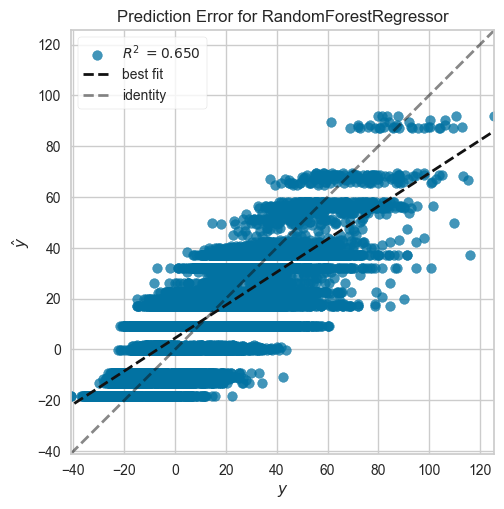

In [37]:
# Reproduzindo os gráficos de regressão
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

# Gráfico de Erro de Predição
# Eixo X a variável real
# Eixo Y a predição

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


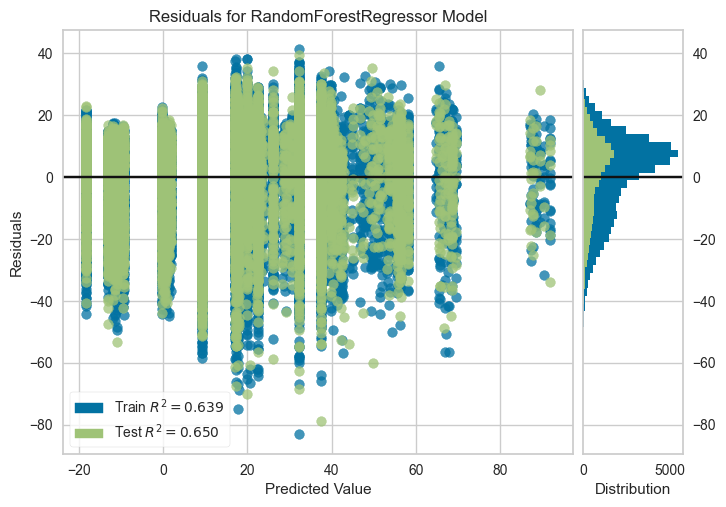

In [38]:
# Gráfico de Residuos = Quando mais distribuido na linha do 0, melhor precisão
# # Eixo X a variável real
# Eixo Y a predição
# Gráfico de  Histograma = Quando mais uniforme em torno do zero, melhor precisão
# Residuos é a diferença entre a variável real e a predição

from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

Validação do Modelo = A validação de modelo é como mostrar ao seu modelo de IA novas jogadas, que ele nunca viu antes, para ver se ele consegue aplicar o que aprendeu. Se ele conseguir, significa que ele realmente aprendeu as regras do jogo!
- Validação cruzada: é uma técnica específica de validação de modelo que divide os dados em vários grupos, treinando o modelo em alguns grupos e testando em outros. Isso ajuda a garantir que o modelo não esteja "decorando" os dados de treino e que ele realmente aprendeu a generalizar para novos dados.

In [39]:
from sklearn.model_selection import KFold, cross_validate
# neg = negativo (Os recursos de validação do sklearn esperam uma função de utilidade, ou seja, quanto maior, melhor. "Quanto menor o erro, melhor." )
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42) #splits=quantidade

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([2.36974072, 2.15232897, 1.90894461, 1.95583296, 1.96317697]),
 'score_time': array([0.03199959, 0.03099942, 0.03100491, 0.03099966, 0.03099942]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [40]:
# Laços de repetição passando pelas metricas de definir scoring
# cv_results que é o retorno do nosso scoring
for metric in scoring.keys(): 
    scores = cv_results[f'test_{metric}'] #Test ando a metrica
    mean_score = "{:.3f}".format(scores.mean()) #Calculando a media (Lista dentro do dicionário)
    std_score = "{:.3f}".format(scores.std()) #Calculando a desvio padrao

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')

    #Médias e desvios padrao para cada metrica
    #As médias permaneceram praticamente inalteradas
    #Desvio padrãao também está dentro do esperado; baixo, e isto é bom.

MAE Scores: [' -11.074', ' -11.303', ' -11.056', ' -11.145', ' -11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------------------------
RMSE Scores: [' -13.767', ' -14.049', ' -13.793', ' -13.877', ' -13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------------------------
R2 Scores: [' 0.647', ' 0.624', ' 0.645', ' 0.641', ' 0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------------------------


Descobrir as features com maior impacto em nosso modelo
(Tentar retreinar o modelo com essas features mais importantes a fim de reduzir essa complexidade, porém, sem aquela perca de perfomance)

Otimização de hiperparâmetro
- Seleção de recursos

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


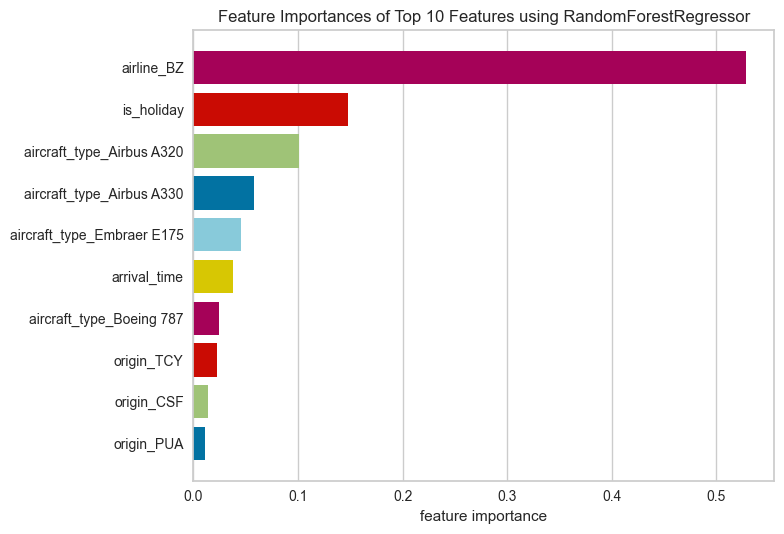

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [41]:
from yellowbrick.model_selection import FeatureImportances # Feature Importantes (Precisamos da importância absoluta)
# Top 10
viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()


In [42]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [43]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2']) # Dataframe novo

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5) # Instanciando o modelo RandomForestRegressor

for count in [1, 5, 10, 15, 20, 25, 30]: # Loop para testar diferentes quantidades de features
    selected_features = feature_importances['Features'].values[:count] # Selecionando as features com maior importância

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train) # Ajustando o modelo com as features selecionadas

    y_pred = model_selected_features.predict(X_test_selected) # Fazendo a previsão de acordo com o X_test_selected

    metricas = calcular_metricas_regressao(y_test, y_pred) # Calculando as métricas

    results_df[count] = list(metricas.values()) # Adicionando as métricas ao dataframe
    # count está sendo criada para uma coluna mais importantes, 5 mais importantes e etc... E que terá os indices que criamos no df novo

results_df

#As menlhores features foram a partir de 10. Então vamos fazer um range a partir de 10

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


In [44]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2']) # Dataframe novo

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5) # Instanciando o modelo RandomForestRegressor

for count in range (10, 16): # Loop para testar diferentes quantidades de features
    selected_features = feature_importances['Features'].values[:count] # Selecionando as features com maior importância

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train) # Ajustando o modelo com as features selecionadas

    y_pred = model_selected_features.predict(X_test_selected) # Fazendo a previsão de acordo com o X_test_selected

    metricas = calcular_metricas_regressao(y_test, y_pred) # Calculando as métricas

    results_df[count] = list(metricas.values()) # Adicionando as métricas ao dataframe
    # count está sendo criada para uma coluna mais importantes, 5 mais importantes e etc... E que terá os indices que criamos no df novo

results_df

# O valor linear é por volta de 13. Entao vamos trabalhar com as 13 mais importantes

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [45]:
selected_features = feature_importances['Features'].values[:13]
X_select_features = X[selected_features]

In [46]:
X_select_features

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175
0,0,8.885071,0,0,0,1,0,1,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,0,0,1
3,0,15.967963,0,0,1,0,0,0,1,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,1,1,0,0,0,0,0,0,0,1
71171,0,16.718722,1,1,1,0,0,0,1,0,0,0,0
71172,1,8.564949,1,1,0,1,0,0,0,0,0,1,0
71173,1,9.344097,1,1,1,0,0,1,0,0,0,0,0


In [47]:
#Redividir em X_train e y_train
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

Otimizando os hiperparametro com o GridSearchCV

In [ ]:
param_grid = {
'max_depth': [5, 10, 15], # Este hiperparâmetro controla a profundidade máxima das árvores de decisão na floresta. Limitar a profundidade pode ajudar a evitar overfitting, pois impede que as árvores se ajustem muito aos dados de treino e não consigam fazer boas previsões para novos dados.
'min_samples_leaf': [1, 2, 3], # Este hiperparâmetro define o número mínimo de amostras exigidas em uma folha (nó terminal) da árvore. Isso ajuda a controlar a granularidade da árvore e pode impedir que folhas contenham muito poucas amostras.
'min_samples_split': [2, 4, 6], # O min_samples_split determina o número mínimo de amostras necessárias para dividir um nó interno da árvore. Isso ajuda a controlar o crescimento das árvores e evita divisões que levam a nós com poucas amostras.
'n_estimators': [100, 150, 200] # Este hiperparâmetro especifica o número de árvores de decisão que serão criadas na floresta aleatória. Quanto maior o número de estimadores, maior será a capacidade do modelo de se ajustar aos dados. No entanto, um número muito alto pode levar a um aumento no tempo de treinamento.
}
# Parametros que o RandomForest possui

In [49]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42) #n_splits=5 indica que os dados serão divididos em 5 partes
#shuffle=True significa que os dados serão embaralhados antes de serem divididos, o que ajuda a garantir que cada parte seja representativa do conjunto de dados total
#random_state=42 é utilizado para garantir que a divisão dos dados seja reprodutível, ou seja, sempre que você executar o código, a divisão será a mesma

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)
#hiperparâmetros do modelo RandomForestRegressor
#param_grid=param_grid refere-se à grade de hiperparâmetros que você definiu anteriormente
#scoring='r2' indica que queremos maximizar o R² como métrica de desempenho
#cv=cv especifica que queremos usar a validação cruzada que definimos na linha anterior
model_grid.fit(X_train, y_train)

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
model_grid.best_params_
# Verificando qual foi o melhor parametro encontrado

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [52]:
#calcularemos agora as métricas para esse modelo, que identificamos como o melhor
y_pred_model_grid = model_grid.predict(X_test) #y_pred _model_grid é a previsão do modelo gridsearch

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid) #calculamos as métricas para o modelo gridsearch
metricas_model_grid

C:\Users\monni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadrático Médio': np.float64(13.2635),
 'Erro Absoluto Médio': np.float64(10.6731),
 'R2 Score': 0.6738}

In [ ]:
# Comparar com os valores obtidos anteriormente
results_df['model_grid'] = list(metricas_model_grid.values()) 
results_df
#Obtivemos um modelo melhor do que os que tínhamos anteriormente, que era o nosso objetivo.
# Por exemplo, com 12 features, nosso RMSE era de 13,74.
# Conseguimos um RMSE de 13,26. O MAE era 11,02. Conseguimos um MAE de 10,67.
# E o R2, que foi a métrica que otimizamos no nosso GridSearchCV, era de 0,65 aproximadamente, e agora está 0,6732.
#De fato conseguimos um modelo melhor do que os anteriores, dado aquelas combinações na grade que foram definidas.

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


Como salvar e disponibilizar o modelo

In [54]:
import pickle

In [55]:
# Para salvar, vamos abrir um arquivo no formato de escrita binária e escrever o melhor modelo,
# no caso, encontrado dentro desse arquivo.
# Abrimos uma célula com with open()
try:
    with open('model_producao.pkl', 'wb') as file: 
        pickle.dump(model_grid.best_estimator_, file) 
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Erro ao salvar o modelo: ', str(e))

# Não estamos escrevendo o model_grid,
# porque o model_grid contém outras informações que não são interessantes para nós.
# Wle retorna, por exemplo, um dicionário contendo todas as informações de cada uma das dobras,
# como o tempo de treinamento, o score da dobra 1, 2, e assim sucessivamente.
# E tem informações que não são relevantes, só queremos utilizar esse modelo.
# Então pegamos somente o melhor modelo, que é justamente o best_estimator_, vírgula.

Modelo salvo com sucesso!!!


O modelo capaz de antecipar os atrasos nos voos. E essa informação pode ser integrada com outros processos aeroportuários, visando a otimização da operação desse aeroporto, contribuindo para uma redução tanto em tempo quanto em custo.

Essa foi a construção de um modelo de machine learning capaz de realizar previsões nos atrasos dos voos e gostaria de te parabenizar por ter concluído.

Passos realizados:
Análise exploratória dos dados;
Preparação dos dados via Feature engineering;
Utilizamos o algoritmo Random Forest Regressor;
Selecionamos as features mais importantes;
Salvamos esse modelo para uso futuro.
No início, nós construímos as análises exploratórias dos dados, extraindo estatísticas descritivas e construindo gráficos para melhor compreensão desses dados.

Logo após, realizamos a preparação desses dados para serem inseridos em um modelo de machine learning através do Feature Engineering. Depois, construímos um modelo de machine learning para servir de base e superamos essa base através do algoritmo Random Forest Regression.

Utilizamos então a validação cruzada para avaliar esse modelo de forma mais assertiva e selecionamos as features mais importantes para retreinar esse modelo sem a perda de desempenho. E por fim, salvamos este modelo em modelo_final.sav para ser disponibilizado para uso futuro.